In [1]:
print("Hello World")

Hello World


In [234]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import statistics 
from sklearn.linear_model import LinearRegression

In [33]:
# Finding out the encoding in the file to help python read the file
with open('netflix_titles.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'MacRoman', 'confidence': 0.7171563147575173, 'language': ''}


In [10]:
df = pd.read_csv('netflix_titles.csv', encoding=result['encoding'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [12]:
df.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
url = "https://fbref.com/en/comps/9/Premier-League-Stats"
tables = pd.read_html(url)

for i, table in enumerate(tables):
    print(f"Table {i}:\n", table.head())

Table 0:
    Rk            Squad  MP   W   D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA  \
0   1        Liverpool  38  25   9   4  86  41  45   84    2.21  82.2  38.6   
1   2          Arsenal  38  20  14   4  69  34  35   74    1.95  59.9  34.4   
2   3  Manchester City  38  21   8   9  72  44  28   71    1.87  68.1  47.7   
3   4          Chelsea  38  20   9   9  64  43  21   69    1.82  67.8  47.3   
4   5    Newcastle Utd  38  20   6  12  68  47  21   66    1.74  63.8  45.5   

    xGD  xGD/90  Attendance      Top Team Scorer      Goalkeeper  \
0  43.6    1.15       60324   Mohamed Salah - 29         Alisson   
1  25.5    0.67       60251      Kai Havertz - 9      David Raya   
2  20.4    0.54       52756  Erling Haaland - 22         Ederson   
3  20.5    0.54       39672     Cole Palmer - 15  Robert Sánchez   
4  18.3    0.48       52187  Alexander Isak - 23       Nick Pope   

                                  Notes  
0  → Champions League via league finish  
1  → Champions League 

In [16]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64


In [35]:
# Converting all column names to a more accessible format
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [40]:
df.drop('release_year', axis=1, inplace=False)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,...,unnamed:_19,unnamed:_20,unnamed:_21,unnamed:_22,unnamed:_23,unnamed:_24,unnamed:_25,year_added,duration_int,is_multiple_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,PG-13,90 min,Documentaries,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,90.0,False
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,2.0,True
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,1.0,False
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,TV-MA,1 Season,"Docuseries, Reality TV",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,1.0,False
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,88 min,"Comedies, Horror Movies",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,88.0,False
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,88 min,"Children & Family Movies, Comedies",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,88.0,False
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,111.0,False
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,2024-04-05,TV-MA,1 Season,"Sci-fi, Horror, Action",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,1.0,False


In [41]:
# Extracting year from date_added
df['year_added'] = df['date_added'].dt.year

In [25]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
print(df['date_added'])

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
8807   2024-04-05
8808   2024-04-05
Name: date_added, Length: 8809, dtype: datetime64[ns]


In [47]:
# Cleaning missing values in the columns that have missing values
df['director'].fillna('Unknown')
df['cast'].fillna('Unknown')
df['country'].fillna('Unknown')
df['rating'].fillna('Unknown')
df['duration'].fillna('Unknown')

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8804       88 min
8805       88 min
8806      111 min
8807     1 Season
8808      110 min
Name: duration, Length: 8809, dtype: object

In [48]:
# Extracting duration of the movies and tv-shows
def extract_duration(x):
    if pd.isna(x) or x == 'Unknown':
        return None
    return int(x.split(' ')[0])

In [27]:
df['duration_int'] = df['duration'].apply(extract_duration)

In [28]:
df['is_multiple_seasons'] = df['duration'].str.contains('Seasons', na=False)

## Visualization

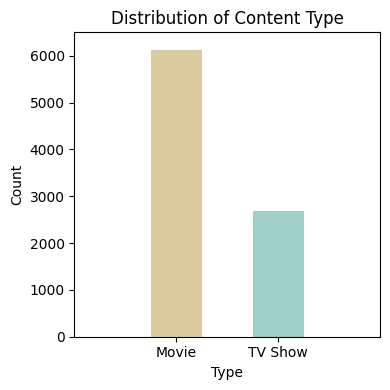

In [209]:
# Bar graph for count of movies and tv-shows
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='type', palette='BrBG', hue='type', width=0.5)
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xlim(-1,2)
plt.ylim(0,6500)
plt.tight_layout()
plt.show()

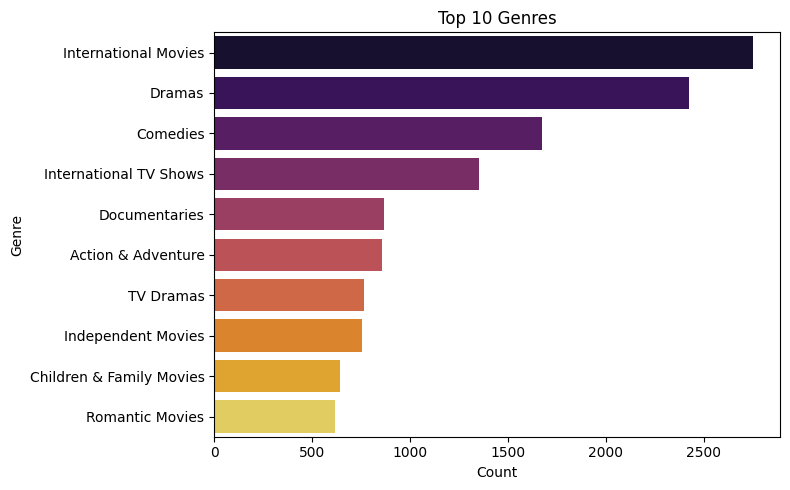

In [96]:
# Visualizing the top genres
all_genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]
genre_counts = Counter(flat_genres).most_common(10)
genres, counts = zip(*genre_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts), y=list(genres), palette='inferno', hue=list(genres))
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

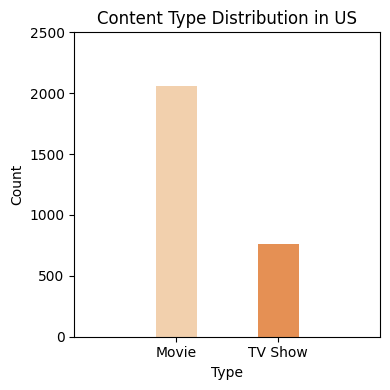

In [208]:
us_data = df[df['country'] == 'United States']

# Sequential palette (e.g., Blues)
sequential_palette = sns.color_palette('Oranges', 3)

# Categorical palette (e.g., Set1)
categorical_palette = sns.color_palette('Blues', 6)

# Combine both palettes
combined_palette = sequential_palette + categorical_palette

# Apply combined palette to a plot
sns.set_palette(combined_palette)


plt.figure(figsize=(4, 4))
sns.countplot(data=us_data, x='type', hue='type', width=0.4)
plt.title('Content Type Distribution in US')
plt.xlabel('Type')
plt.ylabel('Count')
plt.ylim(0,2500)
plt.xlim(-1,2)
plt.tight_layout()
plt.show()

In [148]:
sns.color_palette()

[(0.7058823529411765, 0.8849673202614379, 0.7307189542483661),
 (0.2601307189542484, 0.6509803921568628, 0.7999999999999999),
 (0.9948327566320646, 0.874555940023068, 0.7530334486735871),
 (0.9921568627450981, 0.726797385620915, 0.49150326797385624),
 (0.9914186851211073, 0.550726643598616, 0.23277201076509035),
 (0.9137254901960784, 0.3686274509803921, 0.050980392156862744),
 (0.7145098039215686, 0.23418685121107266, 0.009273356401384082)]

/var/folders/ny/ktjcj0y14pqd91975nqhb5mr0000gn/T/ipykernel_4428/509585588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=multi_season_counts.index.astype(str), y=multi_season_counts.values, palette='colorblind', width=0.6)


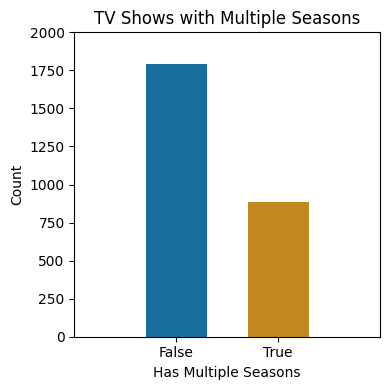

In [191]:
# Bar chart for TV-Shows with Multiple Seasons
tv_shows = df[df['type'] == 'TV Show']
multi_season_counts = tv_shows['is_multiple_seasons'].value_counts()
plt.figure(figsize=(4, 4))
sns.barplot(x=multi_season_counts.index.astype(str), y=multi_season_counts.values, palette='colorblind', width=0.6)
plt.title('TV Shows with Multiple Seasons')
plt.xlabel('Has Multiple Seasons')
plt.ylabel('Count')
plt.ylim(0,2000)
plt.xlim(-1,2)
plt.tight_layout()
plt.show()

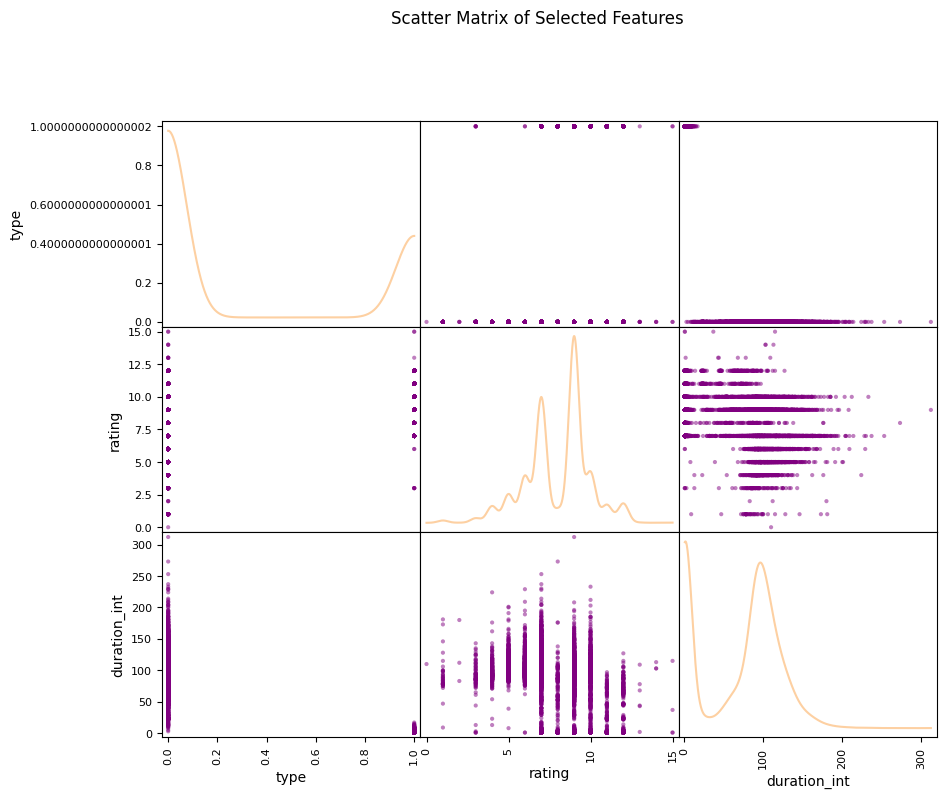

In [210]:
# Scatter Matrix
cols = df[['type', 'rating', 'duration_int']].dropna()
cols['type'] = cols['type'].astype('category').cat.codes
cols['rating'] = cols['rating'].astype('category').cat.codes
scatter_matrix(cols, figsize=(10, 8), diagonal='kde', color='purple')
plt.suptitle('Scatter Matrix of Selected Features', y=1.02)
plt.show()

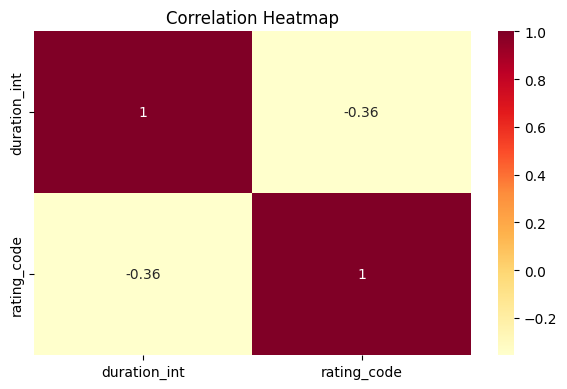

In [224]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
numeric_df = df[['duration_int']].copy()
numeric_df['rating_code'] = df['rating'].astype('category').cat.codes
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Statistical Analysis

In [227]:
# Basic descriptive stats
clean_d = df['duration_int'].dropna()
print("Mean:", statistics.mean(clean_d))
print("Median:", statistics.median(clean_d))
print("Mode:", statistics.mode(clean_d))
print("Standard Deviation:", statistics.stdev(clean_d))

Mean: 69.84362934362935
Median: 88.0
Mode: 1.0
Standard Deviation: 50.816155123483334


In [236]:
# Hypothesis Testing
movies = df[df['type'] == 'Movie']['duration_int'].dropna()
tv_shows = df[df['type'] == 'TV Show']['duration_int'].dropna()
t_stat, p_val = stats.ttest_ind(movies, tv_shows, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")
alpha = 0.05  # Significance level
if p_val < alpha:
    print("\nWe Reject the null hypothesis. There is a significant difference between movie and TV show durations.")
else:
    print("\nWe Fail to reject the null hypothesis. There is no significant difference between movie and TV show durations.")

T-statistic: 269.7336, P-value: 0.0000

We Reject the null hypothesis. There is a significant difference between movie and TV show durations.


In [ ]:
# Linear Regression
reg_df = df[['duration_int', 'rating']].dropna()
reg_df['rating_code'] = reg_df['rating'].astype('category').cat.codes
X = sm.add_constant(reg_df['rating_code'])
y = reg_df['duration_int']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           duration_int   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     1276.
Date:                Sat, 31 May 2025   Prob (F-statistic):          3.94e-261
Time:                        23:05:22   Log-Likelihood:                -46491.
No. Observations:                8806   AIC:                         9.299e+04
Df Residuals:                    8804   BIC:                         9.300e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         143.9053      2.134     67.432      

In [249]:
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 143.90526247565967
Coefficient: 0.0


In [247]:
# Chi-Square test
crosstab = pd.crosstab(df['type'], df['rating'])
chi2, p, dof, ex = stats.chi2_contingency(crosstab)
print(f"Chi2 Statistic: {chi2:.4f}, P-value: {p:.4f}, Degrees of Freedom: {dof}")
alpha = 0.05  
if p < alpha:
    print("\nWe Reject the null hypothesis. There is a significant association between 'type' and 'rating'.")
else:
    print("\nWe Fail to reject the null hypothesis. There is no significant association between 'type' and 'rating'.")

Chi2 Statistic: 1048.9359, P-value: 0.0000, Degrees of Freedom: 18

We Reject the null hypothesis. There is a significant association between 'type' and 'rating'.
